In [36]:
import pandas as pd

# Load your data
df = pd.read_csv('cleaned_data.csv')
df.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_difference
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,75111.366667
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,299.066667
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.016667
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,8201.416667
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,72691.016667


In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

### Logistic Regression w/no SMOTE


Training Metrics:
Accuracy: 0.95
Precision: 0.91
Recall: 0.52
F1 Score: 0.67
Confusion Matrix:
[[109022    566]
 [  5376   5925]]

Test Metrics:
Accuracy: 0.95
Precision: 0.91
Recall: 0.53
F1 Score: 0.67
Confusion Matrix:
[[27226   147]
 [ 1347  1503]]

Confusion Matrix Visualizations:


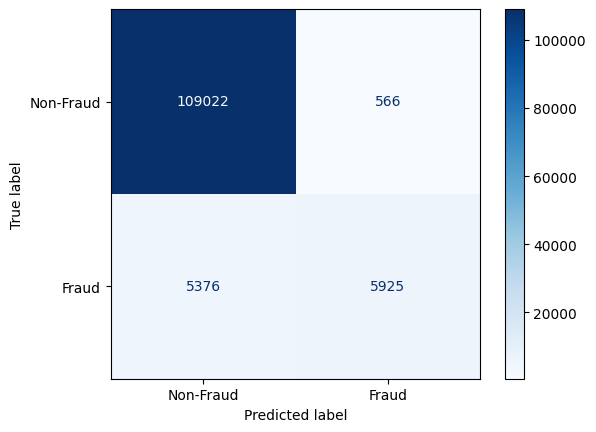

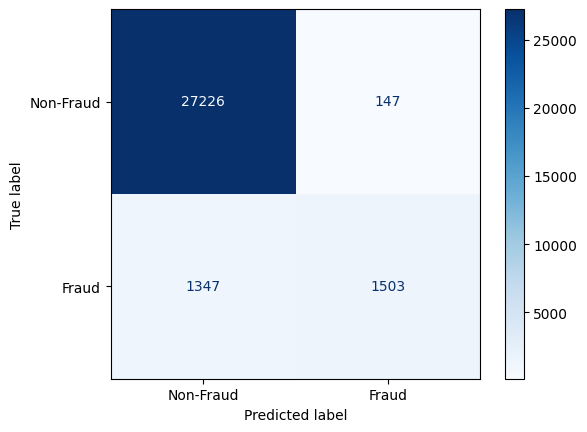

In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline


df['unique_user_count_per_device'] = df.groupby('device_id')['user_id'].transform('nunique')

X = df[['time_difference', 'unique_user_count_per_device']]  # Select relevant features
y = df['class']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('lr', LogisticRegression())
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)


print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

### Decision Tree w/no SMOTE


Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[109588      0]
 [     0  11301]]

Test Metrics:
Accuracy: 0.92
Precision: 0.60
Recall: 0.59
F1 Score: 0.59
Confusion Matrix:
[[26262  1111]
 [ 1180  1670]]

Confusion Matrix Visualizations:


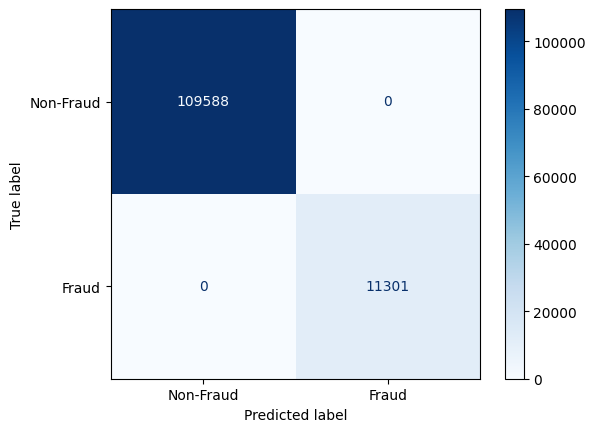

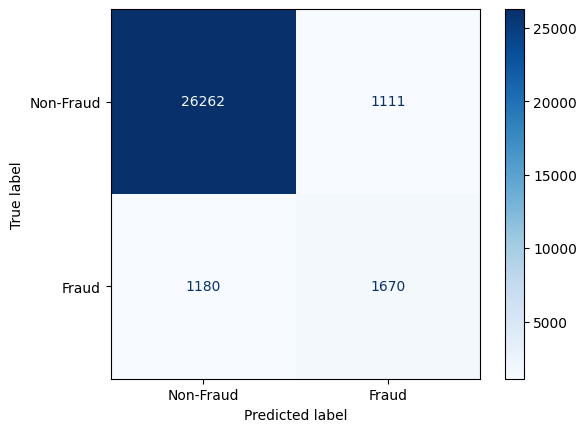

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

df['unique_user_count_per_device'] = df.groupby('device_id')['user_id'].transform('nunique')


X = df[['time_difference', 'unique_user_count_per_device']]  # Select relevant features
y = df['class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(class_weight='balanced', random_state=42))  
])


pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)


train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)


print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)


print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

### Logistic Regression With SMOTE


Training Metrics:
Accuracy: 0.95
Precision: 0.89
Recall: 0.54
F1 Score: 0.67
Confusion Matrix:
[[108807    781]
 [  5155   6146]]

Test Metrics:
Accuracy: 0.95
Precision: 0.89
Recall: 0.55
F1 Score: 0.68
Confusion Matrix:
[[27178   195]
 [ 1295  1555]]

Confusion Matrix Visualizations:


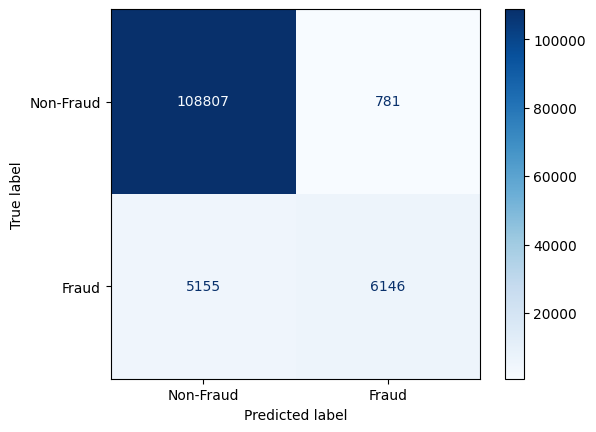

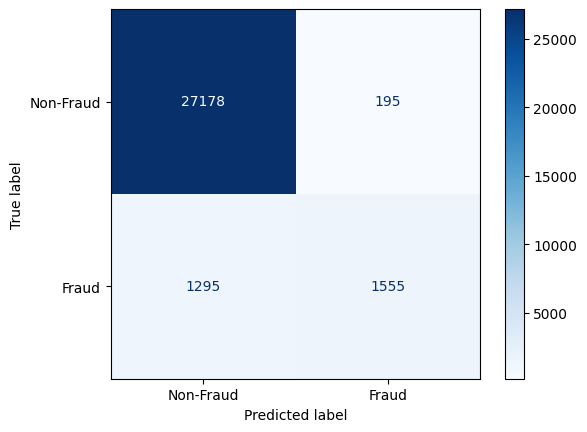

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE  # Import SMOTE
from imblearn.pipeline import Pipeline as imbalanced_Pipeline

df['unique_user_count_per_device'] = df.groupby('device_id')['user_id'].transform('nunique')

X = df[['time_difference', 'unique_user_count_per_device']]  # Select relevant features
y = df['class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imbalanced_pipeline = imbalanced_Pipeline([
    ('smote', SMOTE(random_state=42)), 
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced')) 
])

imbalanced_pipeline.fit(X_train, y_train)

y_train_pred = imbalanced_pipeline.predict(X_train)
y_test_pred = imbalanced_pipeline.predict(X_test)

train_accuracy = imbalanced_pipeline.score(X_train, y_train)
test_accuracy = imbalanced_pipeline.score(X_test, y_test)


train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)


test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)


print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

### Decision Tree w/SMOTE


Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[109585      3]
 [     0  11301]]

Test Metrics:
Accuracy: 0.75
Precision: 0.22
Recall: 0.66
F1 Score: 0.33
Confusion Matrix:
[[20776  6597]
 [  964  1886]]

Confusion Matrix Visualizations:


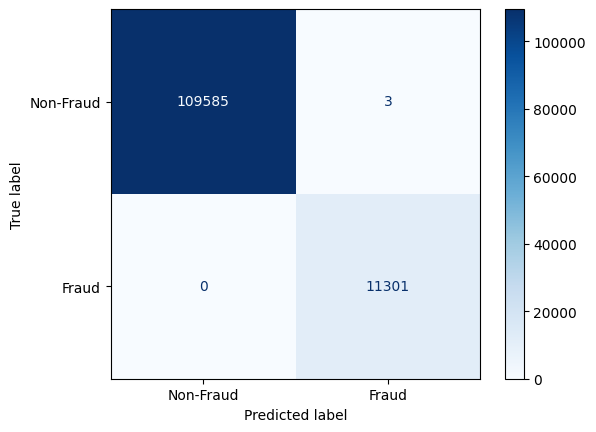

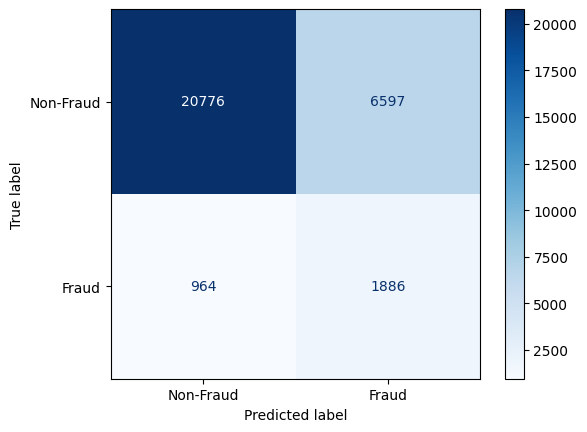

In [179]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE



df['unique_user_count_per_device'] = df.groupby('device_id')['user_id'].transform('nunique')

X = df[['time_difference', 'unique_user_count_per_device']]  # Select relevant features
y = df['class']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



pipeline = imbalanced_Pipeline([
    ('smote', SMOTE(random_state=42)),  
    ('scaler', StandardScaler()), 
    ('dt', DecisionTreeClassifier(class_weight='balanced', random_state=42))  
])


pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)  

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

### Random Forest W/O SMOTE


Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[109567      1]
 [    13  11308]]

Test Metrics:
Accuracy: 0.92
Precision: 0.58
Recall: 0.58
F1 Score: 0.58
Confusion Matrix:
[[26211  1182]
 [ 1185  1645]]

Confusion Matrix Visualizations:


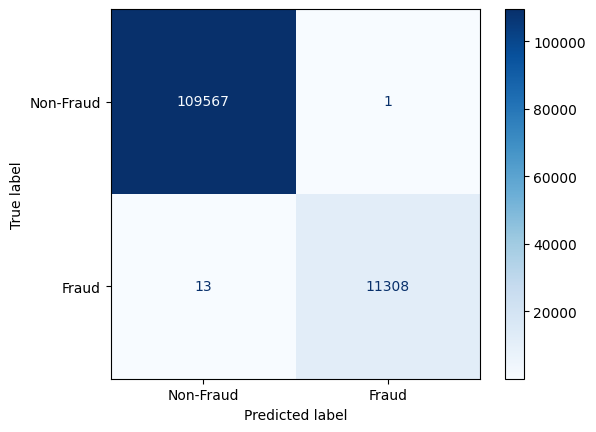

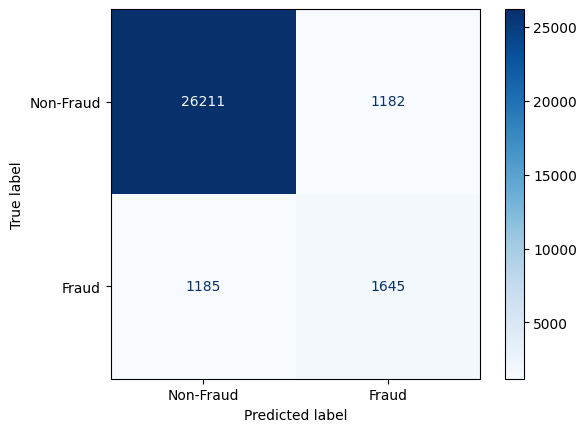

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbalanced_Pipeline
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming df is already loaded
df['unique_users_per_device'] = df.groupby('device_id')['user_id'].transform('nunique')

X = df[['time_difference', 'unique_users_per_device']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define the pipeline with SMOTE included
pipeline = imbalanced_Pipeline([
    ('scaler', StandardScaler()),            # Standardizing the features
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))  # Random Forest Classifier model
])

# Train the model on the resampled data
pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate training metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Calculate testing metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Print metrics
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)


print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

### Random Forest Classifier w/SMOTE


Training Metrics:
Accuracy: 1.00
Precision: 0.99
Recall: 1.00
F1 Score: 0.99
Confusion Matrix:
[[109400    168]
 [     6  11315]]

Test Metrics:
Accuracy: 0.75
Precision: 0.22
Recall: 0.67
F1 Score: 0.33
Confusion Matrix:
[[20751  6642]
 [  941  1889]]

Confusion Matrix Visualizations:


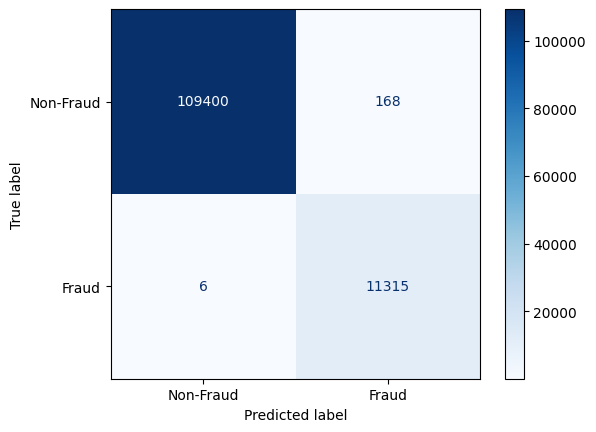

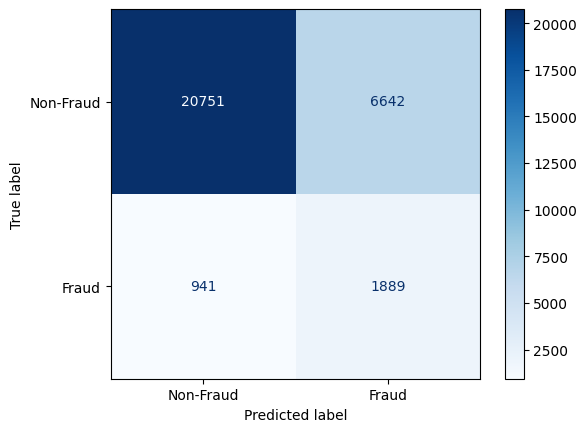

In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay

df['unique_users_per_device'] = df.groupby('device_id')['user_id'].transform('nunique')


X = df[['time_difference', 'unique_users_per_device']]  
y = df['class']  # The target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


pipeline = imbalanced_Pipeline([
    ('smote', SMOTE(random_state=42)), 
    ('scaler', StandardScaler()),            # Standardizing the features
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))  # Random Forest Classifier model
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate training metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Calculate testing metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Print metrics
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

# Confusion Matrix Visualizations
print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

| Model                          | Train Accuracy | Train Precision | Train Recall | Train F1 Score | Test Accuracy | Test Precision | Test Recall | Test F1 Score |
|---------------------------------|----------------|-----------------|--------------|----------------|---------------|----------------|-------------|---------------|
| Logistic Regression            | 0.95           | 0.91            | 0.52         | 0.67           | 0.95          | 0.91           | 0.53        | 0.67          |
| Decision Tree Classifier       | 1.00           | 1.00            | 1.00         | 1.00           | 0.92          | 0.60           | 0.59        | 0.59          |
| Logistic Regression w/SMOTE    | 0.95           | 0.89            | 0.54         | 0.67           | 0.95          | 0.89           | 0.55        | 0.68          |
| Decision Tree w/SMOTE          | 1.00           | 1.00            | 1.00         | 1.00           | 0.75          | 0.22           | 0.66        | 0.33          |
| Random Forest Classifier | 1.00       | 1.00      | 1.00    | 1.00        | 0.92     | 0.58       | 0.58     | 0.58      |
| Random Forest Classifier w/SMOTE          | 1.00           | 1.00            | 1.00         | 1.00           | 0.75          | 0.22           | 0.66        | 0.33          |

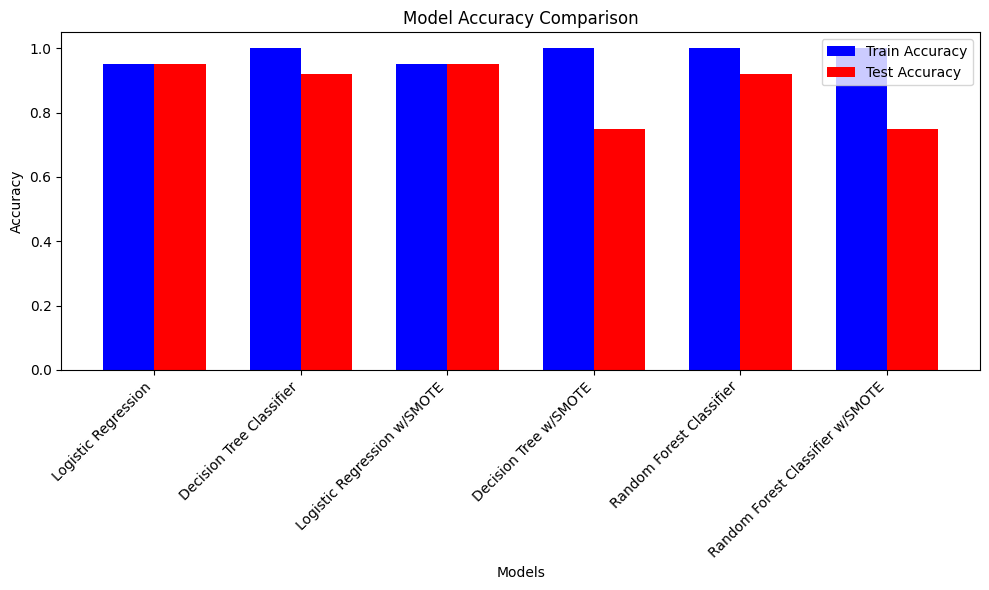

In [169]:
import matplotlib.pyplot as plt

# Model names
models = [
    'Logistic Regression', 
    'Decision Tree Classifier', 
    'Logistic Regression w/SMOTE', 
    'Decision Tree w/SMOTE', 
    'Random Forest Classifier', 
    'Random Forest Classifier w/SMOTE'
]

# Train and test accuracy values
train_accuracies = [0.95, 1.00, 0.95, 1.00, 1.00, 1.00]
test_accuracies = [0.95, 0.92, 0.95, 0.75, 0.92, 0.75]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for train and test accuracy
bar_width = 0.35
index = range(len(models))

# Plotting the bars
bar1 = ax.bar(index, train_accuracies, bar_width, label='Train Accuracy', color='b')
bar2 = ax.bar([i + bar_width for i in index], test_accuracies, bar_width, label='Test Accuracy', color='r')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Display the chart
plt.tight_layout()
plt.show()

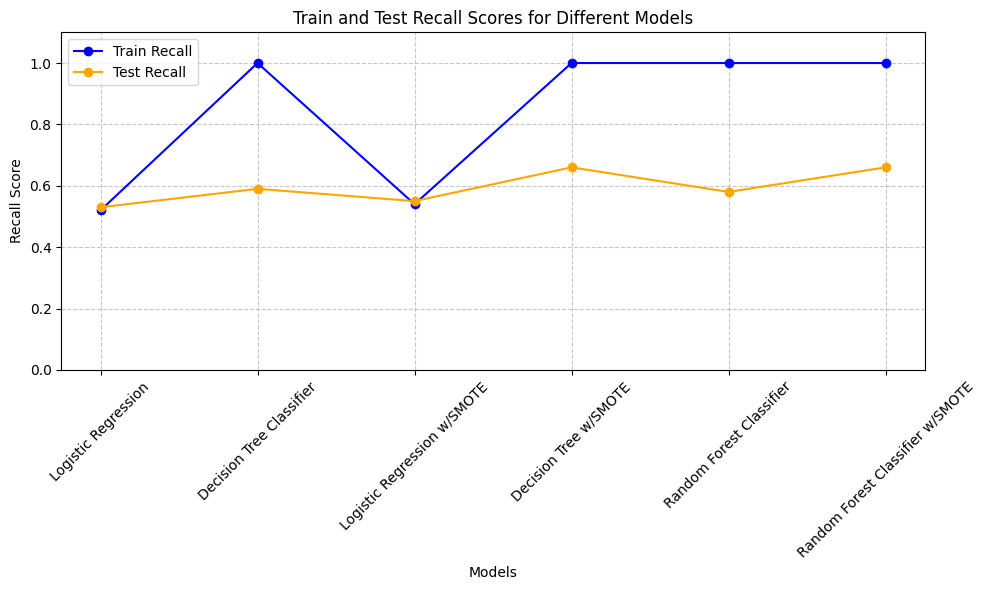

In [170]:
import matplotlib.pyplot as plt

# Model names and recall scores
models = [
    'Logistic Regression', 
    'Decision Tree Classifier', 
    'Logistic Regression w/SMOTE', 
    'Decision Tree w/SMOTE', 
    'Random Forest Classifier', 
    'Random Forest Classifier w/SMOTE'
]
train_recall = [0.52, 1.00, 0.54, 1.00, 1.00, 1.00]
test_recall = [0.53, 0.59, 0.55, 0.66, 0.58, 0.66]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(models, train_recall, marker='o', label="Train Recall", color="blue")
plt.plot(models, test_recall, marker='o', label="Test Recall", color="orange")

# Add labels, title, and legend
plt.xlabel("Models")
plt.ylabel("Recall Score")
plt.title("Train and Test Recall Scores for Different Models")
plt.ylim(0, 1.1)  # Set y-axis limits for better visibility
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()

# Show the grid and the plot
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

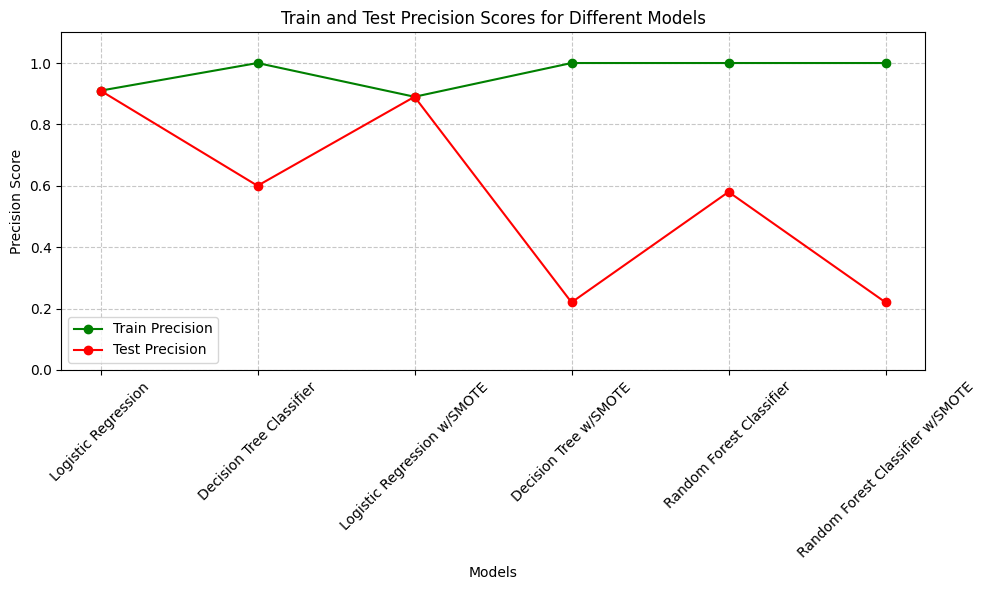

In [171]:
import matplotlib.pyplot as plt

# Model names
models = [
    'Logistic Regression', 
    'Decision Tree Classifier', 
    'Logistic Regression w/SMOTE', 
    'Decision Tree w/SMOTE', 
    'Random Forest Classifier', 
    'Random Forest Classifier w/SMOTE'
]

# Precision scores
train_precision = [0.91, 1.00, 0.89, 1.00, 1.00, 1.00]
test_precision = [0.91, 0.60, 0.89, 0.22, 0.58, 0.22]

# Plot Precision Scores
plt.figure(figsize=(10, 6))
plt.plot(models, train_precision, marker='o', label="Train Precision", color="green")
plt.plot(models, test_precision, marker='o', label="Test Precision", color="red")
plt.xlabel("Models")
plt.ylabel("Precision Score")
plt.title("Train and Test Precision Scores for Different Models")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

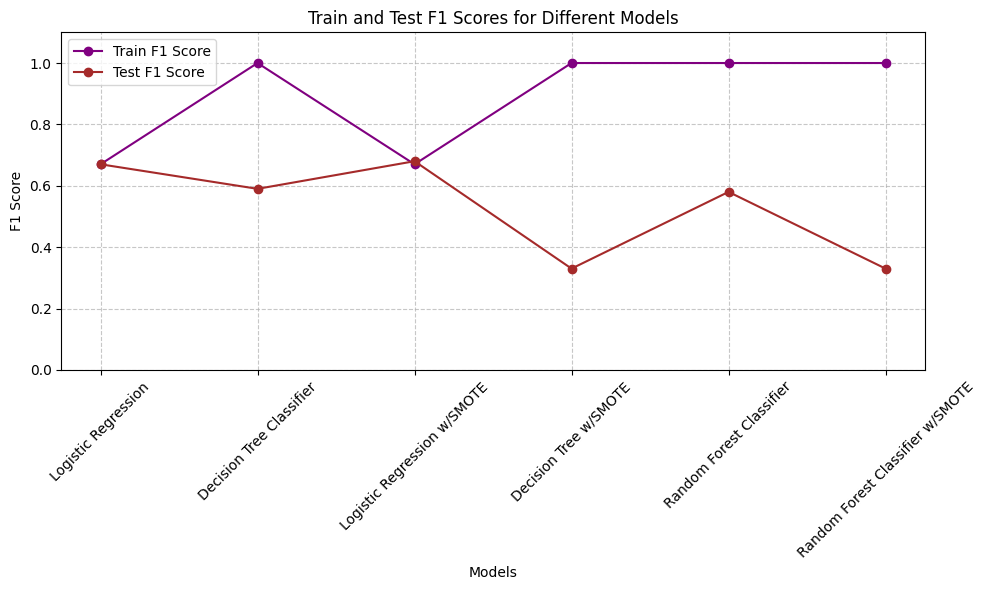

In [172]:
import matplotlib.pyplot as plt

# Model names
models = [
    'Logistic Regression', 
    'Decision Tree Classifier', 
    'Logistic Regression w/SMOTE', 
    'Decision Tree w/SMOTE', 
    'Random Forest Classifier', 
    'Random Forest Classifier w/SMOTE'
]

# F1 scores
train_f1 = [0.67, 1.00, 0.67, 1.00, 1.00, 1.00]
test_f1 = [0.67, 0.59, 0.68, 0.33, 0.58, 0.33]

# Plot F1 Scores
plt.figure(figsize=(10, 6))
plt.plot(models, train_f1, marker='o', label="Train F1 Score", color="purple")
plt.plot(models, test_f1, marker='o', label="Test F1 Score", color="brown")
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("Train and Test F1 Scores for Different Models")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()